Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
A*
goal
Recover path
[[634 141]
 [633 142]
 [632 143]
 ...
 [349 402]
 [349 401]
 [350 400]]
Length of Path:  803.1147904132629


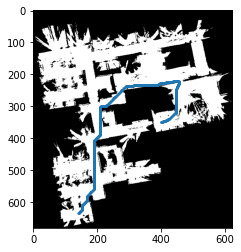

In [1]:
from PIL import Image, ImageDraw
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')
occupancy_map_img = Image.open('drive/MyDrive/occupancy_map.png')
occupancy_grid = (np.asarray(occupancy_map_img) > 0).astype(int)

N = len(occupancy_grid)
M = len(occupancy_grid[1])
V = []
CostTo = {}
EstTotalCost = {}
pred = {}
Q = []
for i in range(N):
    for j in range(M):
        V.append((i,j))

def RecoverPath(s,g,pred):
    path = []
    x = g
    length = 0

    print("Recover path")
    while x!=s:
        path.insert(0,x)
        length += heuristic(x,pred[x])
        x = pred[x]
    return path,length

def heuristic(v1,v2):   # euclidean distance
    x1,y1 = v1
    x2,y2 = v2
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

def Neighbours(v):
    x,y = v
    filter =[[-1,-1], [0,-1], [1,-1],
            [-1,0], [1,0],
            [-1,1], [0,1], [1,1]]

    near = []
    for f in filter:
        new_x = x + f[0];
        new_y = y + f[1];
        if (new_x < 0 or new_x > len(occupancy_grid)-1 or new_y < 0 or new_y > len(occupancy_grid[1])-1):
            continue;
        else:
            near.append([new_x,new_y])
    return near

def Unoccupied_Neighbours(v):
    near = Neighbours(v)
    unoccupied_near = []

    for i in near:
        if occupancy_grid[i[0],i[1]] == 1:
            unoccupied_near.append(i)
    return unoccupied_near


def A_Star_Search(V,start,goal):
    print("A*")
    for v in V:
        CostTo[tuple(v)] = float("inf")                #set initial condition
        EstTotalCost[tuple(v)] = float("inf")          #  "    "   "

    CostTo[tuple(start)] = 0
    EstTotalCost[tuple(start)] = heuristic(start,goal)
    Q.append((start,EstTotalCost[start]))

    while len(Q) != 0:
        v,_ = Q.pop(0)
        if v == list(goal):
            print("goal")
            return RecoverPath(start,goal,pred) 
            
        for i in Unoccupied_Neighbours(v):
            Neighbour_cost = CostTo[tuple(v)] + heuristic(v,i);
            
            if Neighbour_cost < CostTo[tuple(i)]:
                pred[tuple(i)] = tuple(v)
                CostTo[tuple(i)] = Neighbour_cost
                EstTotalCost[tuple(i)] = Neighbour_cost + heuristic(i,goal)
                
                flag = 0
                for ele in Q:
                    if i == ele[0]:
                        index = Q.index(ele)
                        Q[index] = [i, EstTotalCost[tuple(i)]]
                        Q.sort(key = lambda x:x[1])
                        flag = 1
                        break
                        
                if flag == 0:
                    Q.append([i, EstTotalCost[tuple(i)]])
                    Q.sort(key = lambda x:x[1])
    return []
                     

def main():

    s = (635,140)
    g = (350,400)
    final_route,length = A_Star_Search(V,s,g)
    final_route = np.array(final_route)
    plt.imshow(occupancy_map_img, cmap='gray')
    plt.scatter(final_route[:,1],final_route[:,0],s = 2)
    print(final_route)
    print("Length of Path: ",length)
    
    
if __name__ == "__main__":
    main()